<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]
roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Графики будем строить через Seaborn
import seaborn as sns
sns.set()

# Более четкая отрисовка графиков в Inline режиме
%config InlineBackend.figure_format = 'retina'

Для быстрой агрегации статискик по датасету можно использовать удобную утилиту [`pandas-profiling`](https://pypi.org/project/pandas-profiling/).

In [3]:
# !pip install pandas-profiling
# import pandas_profiling

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
df = pd.read_csv('./train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
# report = pandas_profiling.ProfileReport(df)
# report.to_widgets()

Посмотрим на несколько элементов:

In [7]:
print('Размер датасета: ', df.shape)
df.sample(10)

Размер датасета:  (5282, 20)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1917,3,107.95,313.6,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,0
2807,33,34.05,1113.95,Male,0,No,Yes,No,No phone service,DSL,Yes,No,No,Yes,No,No,One year,No,Credit card (automatic),0
75,45,96.75,4442.75,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Bank transfer (automatic),0
1964,37,20.35,697.65,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),0
4766,12,25.40,313,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
2066,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),1
506,70,115.65,7968.85,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),1
466,71,77.55,5574.35,Female,0,Yes,Yes,Yes,No,DSL,Yes,No,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),0
2192,23,95.30,2192.9,Male,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Mailed check,0
3955,45,62.70,2791.5,Male,1,No,No,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Credit card (automatic),1


Посмотрим на основные характеристики и статискики числовых признаков датасета:

In [8]:
df.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


Категориальные признаки:

In [9]:
df.describe(include=['object', 'bool'])

,TotalSpent,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
count,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282
unique,4978,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,20.2,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,9,2655,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Почему-то TotalSpent имеет тип object, а IsSeniorCitizen имеет тип int64.
`TotalSpent` не удалось сконвертировать из за объектов с пустыми сточками.

In [11]:
df[(df['TotalSpent'] == ' ')]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [12]:
null_ind = df[pd.to_numeric(df['TotalSpent'], errors='coerce').isnull()].index.tolist()
df['TotalSpent'] = pd.to_numeric(df['TotalSpent'], errors='coerce')
# df.loc[null_ind, :]
# mean_TotalSpent = df['TotalSpent'].mean()
# df['TotalSpent'].fillna((mean_TotalSpent), inplace=True)
df.loc[null_ind, :]['MonthlySpending']

1048    25.75
1707    73.35
2543    19.70
3078    80.85
3697    20.00
4002    61.90
4326    25.35
4551    52.55
4598    56.05
Name: MonthlySpending, dtype: float64

In [13]:
df['TotalSpent'].fillna((df.loc[null_ind, :]['MonthlySpending']), inplace=True)

In [14]:
# И сконвертируем в нужный формат
df = df.astype({'TotalSpent': 'float64',
                'IsSeniorCitizen': 'object'})

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### Визуализируем численные признаки
Построим гистограммы распределений числовых признаков, и `boxplot` для каждого признака с разделением на `Churn`.

In [15]:
num_cols

['ClientPeriod', 'MonthlySpending', 'TotalSpent']

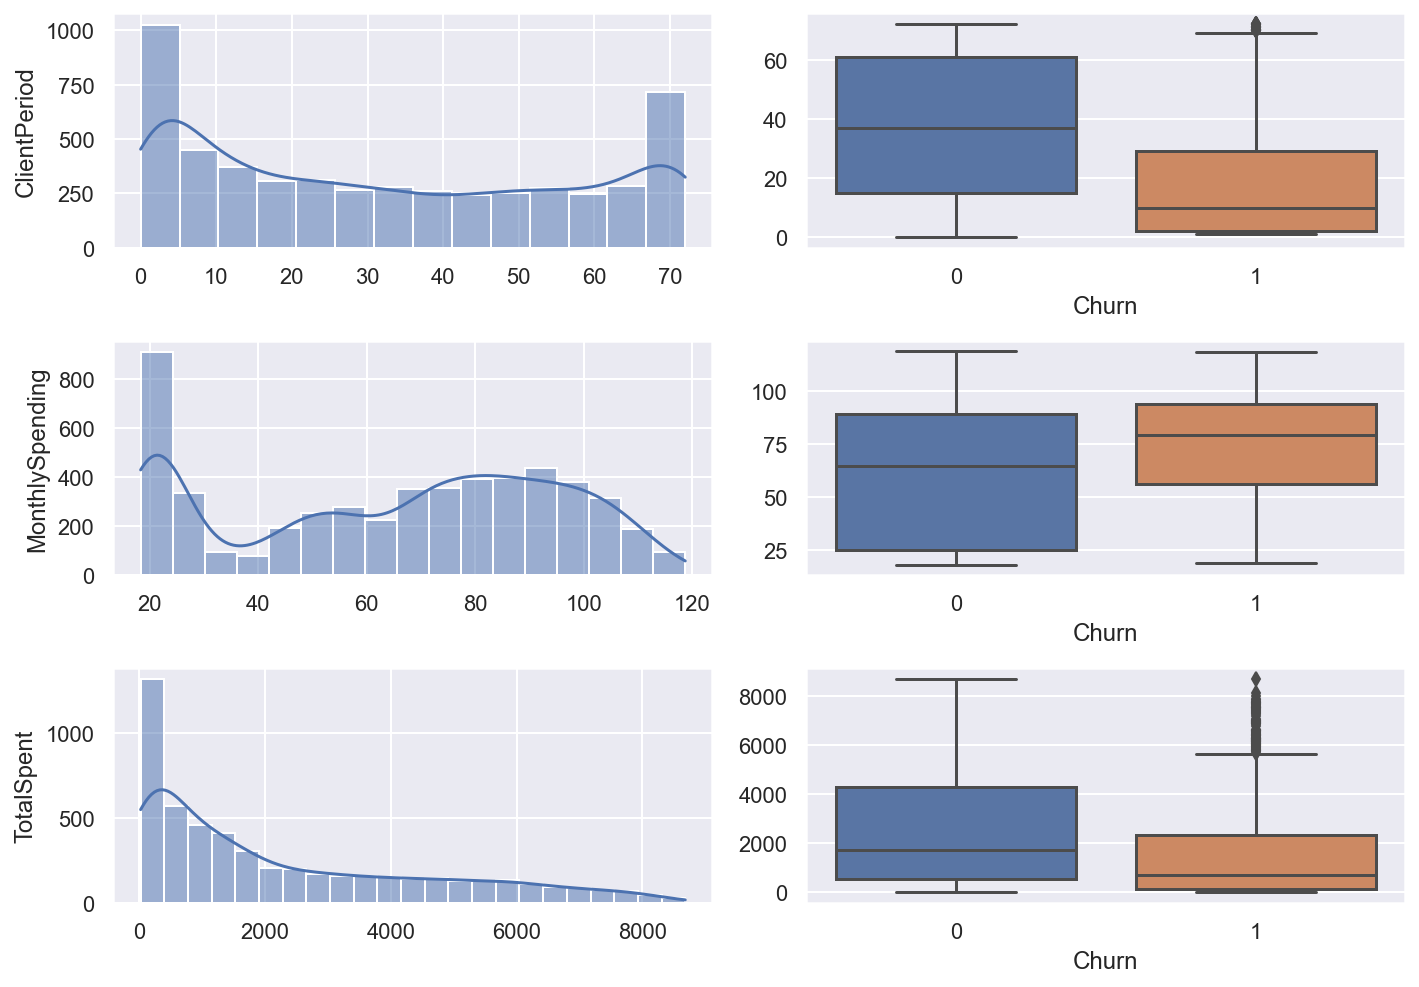

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 7))

for idx, feat in enumerate(num_cols):
    ax = axes[idx, 0]
    sns.histplot(df[feat], kde='True', ax=ax);
    ax.set_xlabel('')
    ax.set_ylabel(feat)
    
    ax = axes[idx, 1]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('Churn')
    ax.set_ylabel('')
    
fig.tight_layout();

Построим `scatterplot` наблюдаемого периода у клиентов и месячных расходов.

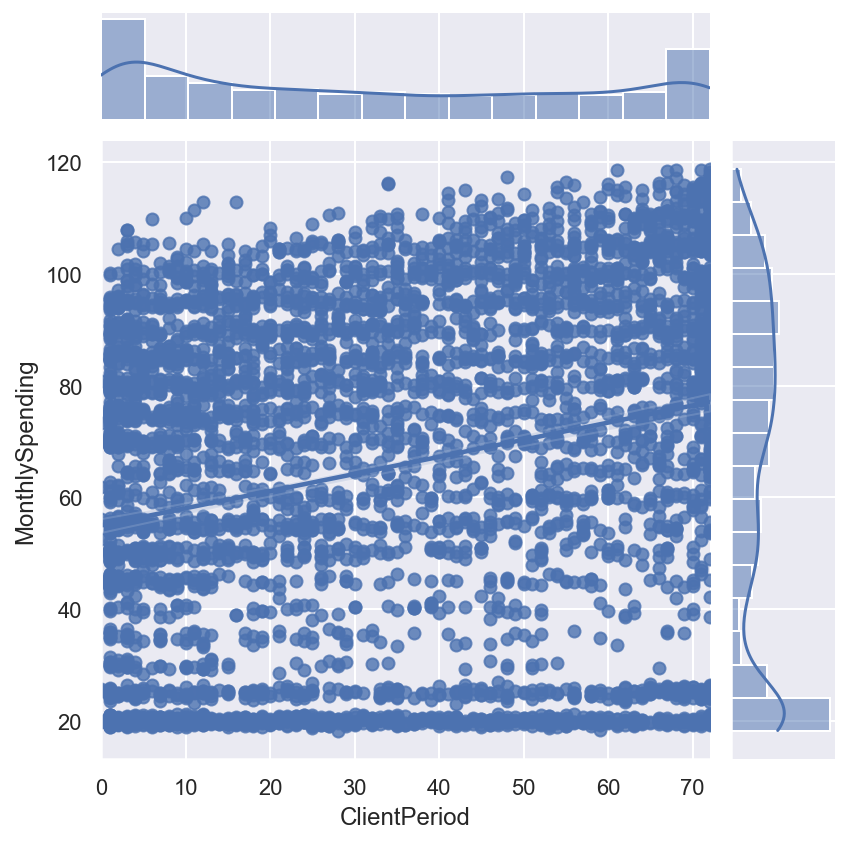

In [17]:
sns.jointplot(data=df, x='ClientPeriod', y='MonthlySpending', kind='reg');

Видим, что ежемесячные расходы в среднем возрастают с тем, насколько долго клиент пользуется сервисами.

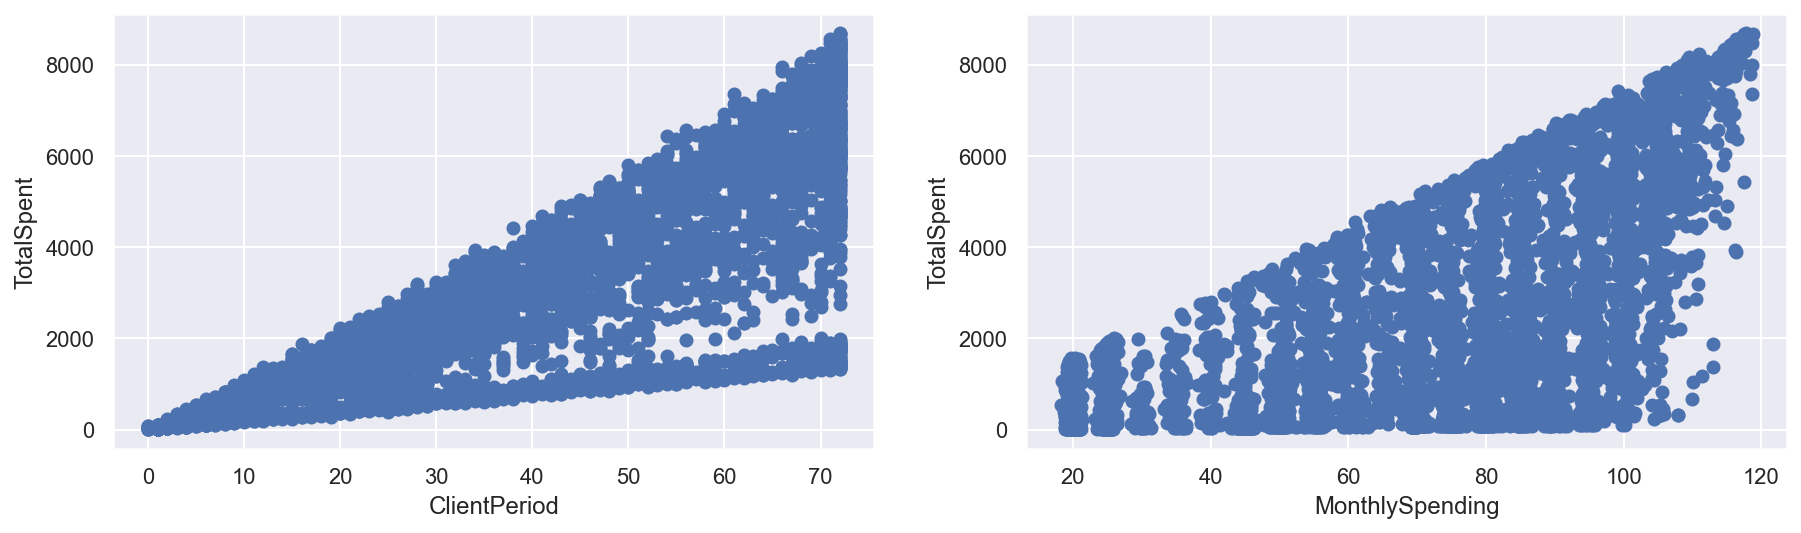

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
for i, s in enumerate(num_cols[:-1]):
    ax[i].scatter(x = df[s], y = df['TotalSpent'])
    ax[i].set_xlabel(s)
    ax[i].set_ylabel('TotalSpent')

### Посмотрим на распределение целевой переменной

0    0.737978
1    0.262022
Name: Churn, dtype: float64


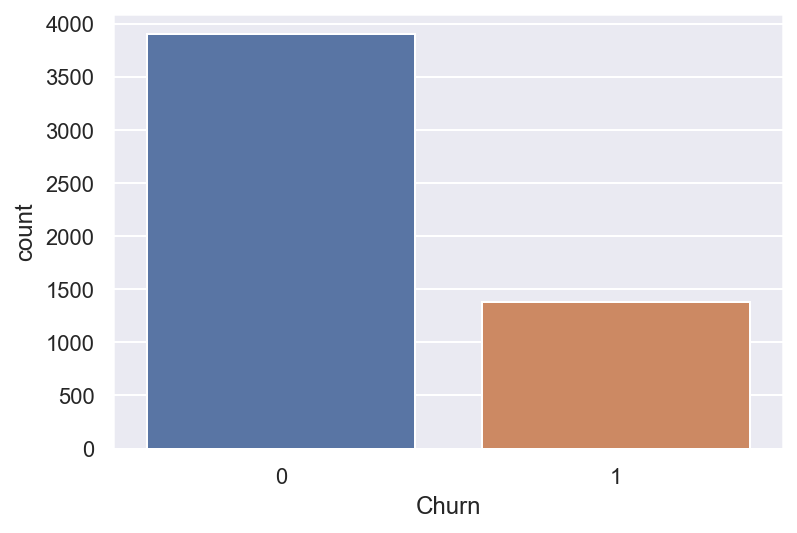

In [19]:
print(df['Churn'].value_counts(normalize=True))
sns.countplot(x='Churn', data=df);

Видим, что целевая переменная не слишком несбалансированна, но всё же 26% оттока клиентов - это очень плохо для компании.

### Визуализируем категориальные признаки
Посчитаем некоторую статистику для уникальных значений признаков:

In [20]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 4:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

ClientPeriod
73
----------
MonthlySpending
1468
----------
TotalSpent
4982
----------
Sex
2 [('Female', 2627), ('Male', 2655)]
----------
IsSeniorCitizen
2 [(0, 4440), (1, 842)]
----------
HasPartner
2 [('No', 2705), ('Yes', 2577)]
----------
HasChild
2 [('No', 3676), ('Yes', 1606)]
----------
HasPhoneService
2 [('No', 521), ('Yes', 4761)]
----------
HasMultiplePhoneNumbers
3 [('No', 2511), ('No phone service', 521), ('Yes', 2250)]
----------
HasInternetService
3 [('DSL', 1800), ('Fiber optic', 2341), ('No', 1141)]
----------
HasOnlineSecurityService
3 [('No', 2612), ('No internet service', 1141), ('Yes', 1529)]
----------
HasOnlineBackup
3 [('No', 2332), ('No internet service', 1141), ('Yes', 1809)]
----------
HasDeviceProtection
3 [('No', 2317), ('No internet service', 1141), ('Yes', 1824)]
----------
HasTechSupportAccess
3 [('No', 2604), ('No internet service', 1141), ('Yes', 1537)]
----------
HasOnlineTV
3 [('No', 2099), ('No internet service', 1141), ('Yes', 2042)]
----------
HasM

Визуализируем каждый категориальный признак в зависимости от `Churn`:

In [21]:
len(cat_cols)

16

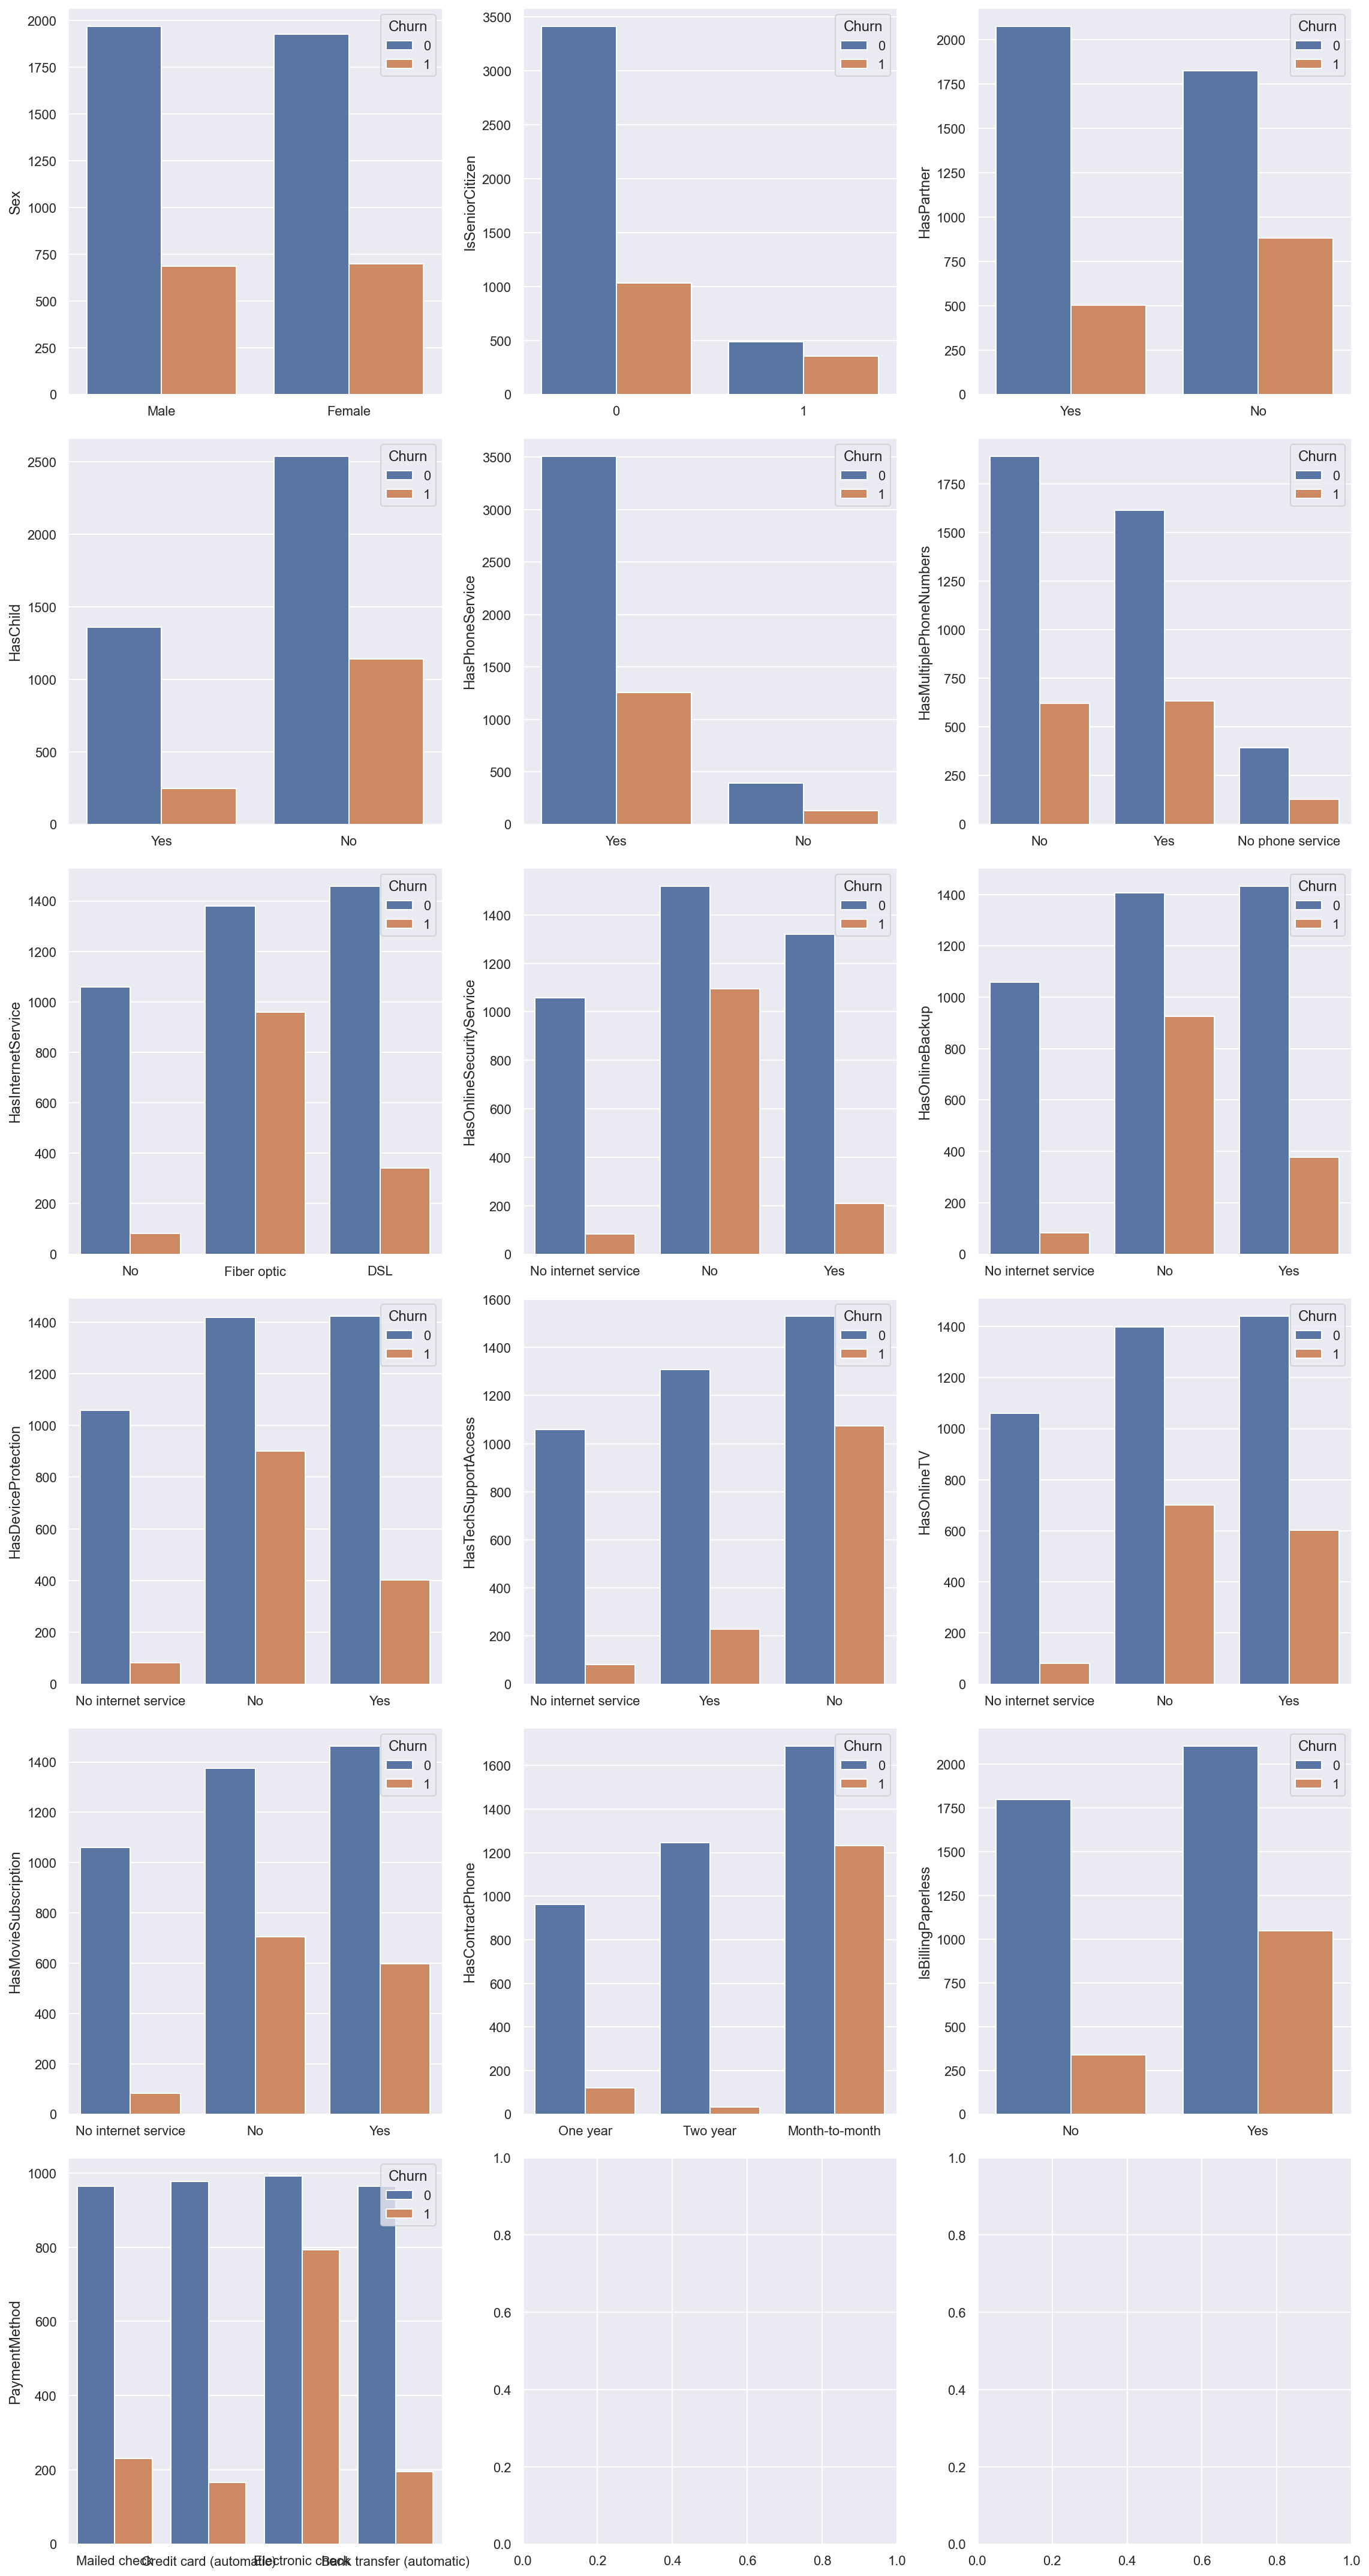

In [22]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16, 30))
for idx, feat in enumerate(cat_cols):
    ax = axes[int(idx / 3), idx % 3]
    sns.countplot(x=feat, hue='Churn', data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

Видим, что отток непропорционально велик у пожилых людей, у людей с FiberOptic (HasInternetService), у людей без HasTechSupportAccess, у людей с Month-to-month (HasContractPhone) и у людей с Electronic check (PaymentMethod).

Можно также преобразовать данные в длинный формат и изобразить количество значений некоторых категориальных функций с помощью `sns.catplot()`.

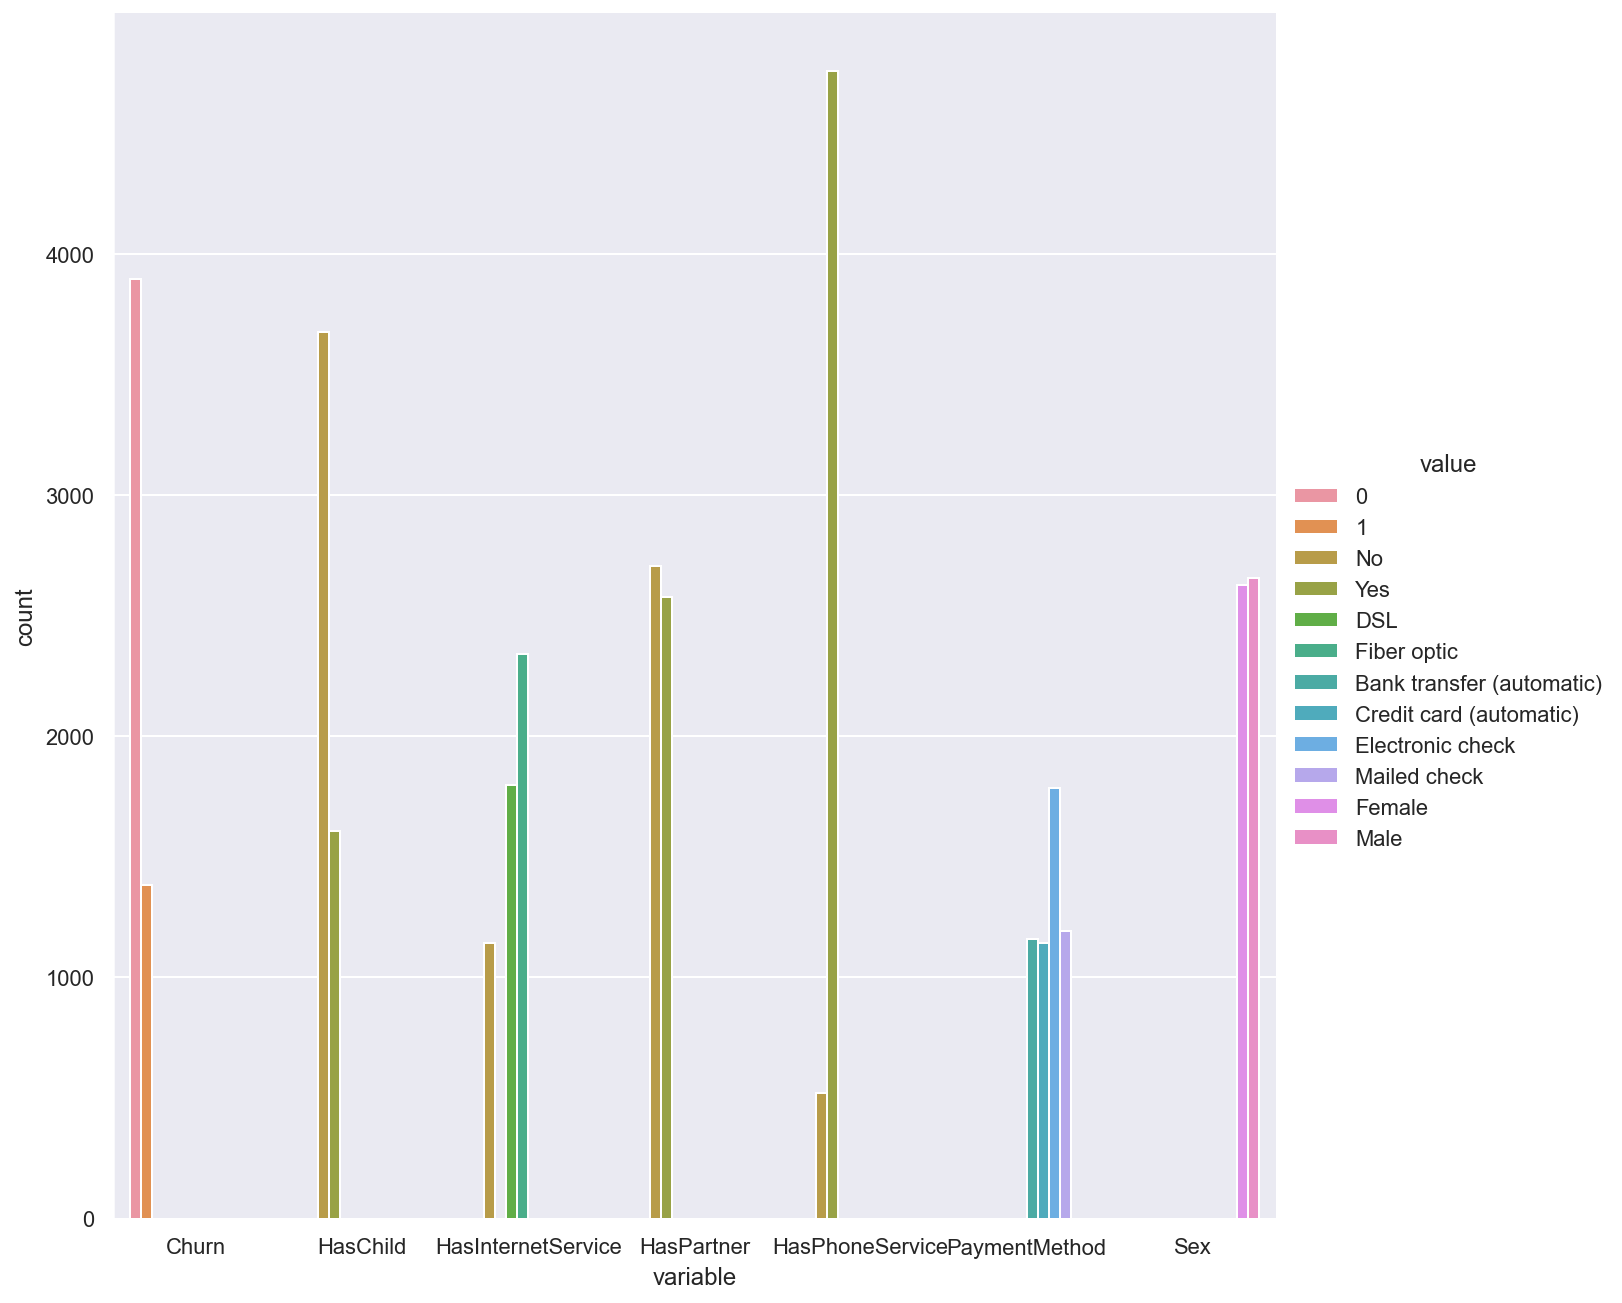

In [23]:
some_cat_cols = ['Sex', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasInternetService', 'PaymentMethod', 'Churn']

df_uniques = pd.melt(frame=df, value_vars=some_cat_cols)

df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()


sns.catplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', height=9);

# plt.figure(figsize=(10,18))
# plt.tight_layout()

### t-SNE

In [24]:
# import warnings
# warnings.filterwarnings('ignore')


# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler
# X = df[num_cols + ['IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService']]
# X['HasPartner'] = X['HasPartner'].map({'Yes': 1, 'No': 0})
# X['HasChild'] = X['HasChild'].map({'Yes': 1, 'No': 0})
# X['HasPhoneService'] = X['HasPhoneService'].map({'Yes': 1, 'No': 0});
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [25]:
# %%time
# tsne = TSNE(random_state=17)
# tsne_repr = tsne.fit_transform(X_scaled)

In [26]:
# plt.figure(figsize=(12, 10))
# plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
#             c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5);

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [27]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

### Предобработка

One-hot encoding категориальных признаков

In [28]:
dummy_features = pd.get_dummies(df[cat_cols])
X = pd.concat([df[num_cols], dummy_features], axis=1)
y = df['Churn']

Разделение на тест и трейн

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8)

Масштабирование числовых признаков

In [30]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

### RandomForest
Сначала попробуем предсказать, используя случайный лес

In [31]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

# forest = RandomForestClassifier(n_estimators=400, n_jobs=-1)

# forest_params = {'max_depth': range(5, 7),
#                  'max_features': range(7, 10)}

# forest_grid = GridSearchCV(forest, 
#                            forest_params,
#                            cv=5,
#                            n_jobs=-1,
#                            scoring='roc_auc',
#                            verbose=True)

# forest_grid.fit(X_train_scaled, y_train)
# forest_grid.best_params_

Оценим качество на трейне и на тесте:

In [32]:
# y_train_predicted = forest_grid.predict_proba(X_train_scaled)[:, 1]
# y_test_predicted = forest_grid.predict_proba(X_test_scaled)[:, 1]
# print('ROC-AUC Train: ', roc_auc_score(y_train, y_train_predicted))
# print('ROC-AUC Test: ', roc_auc_score(y_test, y_test_predicted))

Напишем функцию `apply_model`, которая:
1. Масштабирует весь датасет без разделения (one-hot encoding уже был выполнен);
2. Обучает выбранную модель на всем датасете без разделения;
3. Загружает тестовый датасет;
4. Заменяет пропущенные значения в числовых признаках на 0 и конвертирует в нужный формат;
5. Делает one-hot encoding и масштабирование тестового датасета;
6. Предсказывает значения `Churn` и записывает в файл для загрузки на kaggle.

In [33]:
def apply_model(model, X, y):
    # Fit the model on all train.csv
    scaler = StandardScaler()
    X_df = scaler.fit_transform(X)
    
    model.fit(X_df, y)
    
    
    # Read and drop na's
    df_test = pd.read_csv('./test.csv')
    df_test['TotalSpent'].replace({' ': 0.0}, inplace=True)

    df_test = df_test.astype({'TotalSpent': 'float64',
                              'IsSeniorCitizen': 'object'})
    
    
    # One-hot encoding
    df_test_dummy_features = pd.get_dummies(df_test[cat_cols])
    df_test_d = pd.concat([df_test[num_cols], df_test_dummy_features], axis=1)
    
    
    # StandardScaler
    scaler_test = StandardScaler()
    df_test_scaled = scaler_test.fit_transform(df_test_d)
    
    
    # Write out
    submission = pd.read_csv('./submission.csv', index_col='Id')
    proba = model.predict_proba(df_test_scaled)

    a1 = np.ones((df_test.shape[0], 1))
    reversed_proba = a1 - proba

    submission['Churn'] =  reversed_proba
    submission.to_csv('./my_submission.csv')

Применим для случайного леса:

In [34]:
# apply_model(forest_grid, X, y)

Результат на kaggle: 0.84795

### Логистическая регресия

In [35]:
clf = LogisticRegressionCV(cv=5, scoring='roc_auc')
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf.fit(X_train_scaled, y_train);

In [36]:
y_train_predicted = clf.predict_proba(X_train_scaled)[:, 1]
y_test_predicted = clf.predict_proba(X_test_scaled)[:, 1]
print('ROC-AUC Train: ', roc_auc_score(y_train, y_train_predicted))
print('ROC-AUC Test: ', roc_auc_score(y_test, y_test_predicted))

ROC-AUC Train:  0.8523811090201157
ROC-AUC Test:  0.8327615417196104


In [37]:
apply_model(clf, X, y)

Результата на kaggle: 0.84568. Сравнимо с тем качеством, которое мы получили, используя случайный лес.

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

### catboost

In [48]:
import catboost

X = df.drop(['Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                   train_size=0.90)

cat_indices = np.arange(3, 19)

In [49]:
cat_model = catboost.CatBoostClassifier(iterations=1000,
                                        learning_rate=0.002,
                                        cat_features=cat_indices,
                                        eval_metric='AUC',
                                        verbose=False,
                                        use_best_model=True,
                                        thread_count=-1)

cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))

y_train_predicted = cat_model.predict_proba(X_train)[:, 1]
y_test_predicted = cat_model.predict_proba(X_test)[:, 1]

In [50]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
print('Train ROC-AUC', train_auc)
print('Test ROC-AUC', test_auc)

Train ROC-AUC 0.8544569485178657
Test ROC-AUC 0.8635828585076256


In [51]:
df_test = pd.read_csv('./test.csv')


null_ind = df_test[pd.to_numeric(df_test['TotalSpent'], errors='coerce').isnull()].index.tolist()
df_test['TotalSpent'] = pd.to_numeric(df_test['TotalSpent'], errors='coerce')
# df.loc[null_ind, :]
# mean_TotalSpent = df['TotalSpent'].mean()
# df['TotalSpent'].fillna((mean_TotalSpent), inplace=True)
# df_test.loc[null_ind, :]['MonthlySpending']

df_test['TotalSpent'].fillna((df_test.loc[null_ind, :]['MonthlySpending']), inplace=True)


# df_test['TotalSpent'].replace({' ': 0.0}, inplace=True)
df_test = df_test.astype({'TotalSpent': 'float64',
                          'IsSeniorCitizen': 'object'})


# Write out
submission = pd.read_csv('./submission.csv', index_col='Id')
proba = cat_model.predict_proba(df_test)

a1 = np.ones((df_test.shape[0], 1))
reversed_proba = a1 - proba

submission['Churn'] =  reversed_proba
submission.to_csv('./my_submission.csv')

|try|score|
|---|---|
|1|  0.85093|
|2|  0.85017|
|3|  **0.85522**|
|4|  0.84980|
|5| 0.85066|
 
 ---
 
_**Бузин Глеб**_

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.